**1. Загрузка данных**

In [17]:
import pandas as pd
import numpy as np

In [97]:
births = pd.read_csv('/content/daily-total-female-births-in-cal.csv')
passangers = pd.read_csv('/content/international-airline-passengers.csv')
temperature = pd.read_csv('/content/mean-monthly-air-temperature-deg.csv')
robberies = pd.read_csv('/content/monthly-boston-armed-robberies-j.csv')
sales = pd.read_csv('/content/monthly-sales-of-company-x-jan-6.csv')
dowjones = pd.read_csv('/content/weekly-closings-of-the-dowjones-.csv')

data = {'daily total female births': births,
        'international airline passengers': passangers,
        'mean monthly air temperature': temperature,
        'monthly boston armed robberies': robberies,
        'monthly sales of company': sales,
        'weekly closings of the dowjones': dowjones
        }

for name, data_frame in data.items():
    print(name)
    display(data_frame.info())
    print()

daily total female births
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   Count   365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


None


international airline passengers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   144 non-null    object
 1   Count   144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


None


mean monthly air temperature
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   240 non-null    object 
 1   Deg     240 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


None


monthly boston armed robberies
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   118 non-null    object
 1   Count   118 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


None


monthly sales of company
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   77 non-null     object
 1   Count   77 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


None


weekly closings of the dowjones
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Week    162 non-null    object 
 1   Close   162 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.7+ KB


None

**2. Визуализация рядов**

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

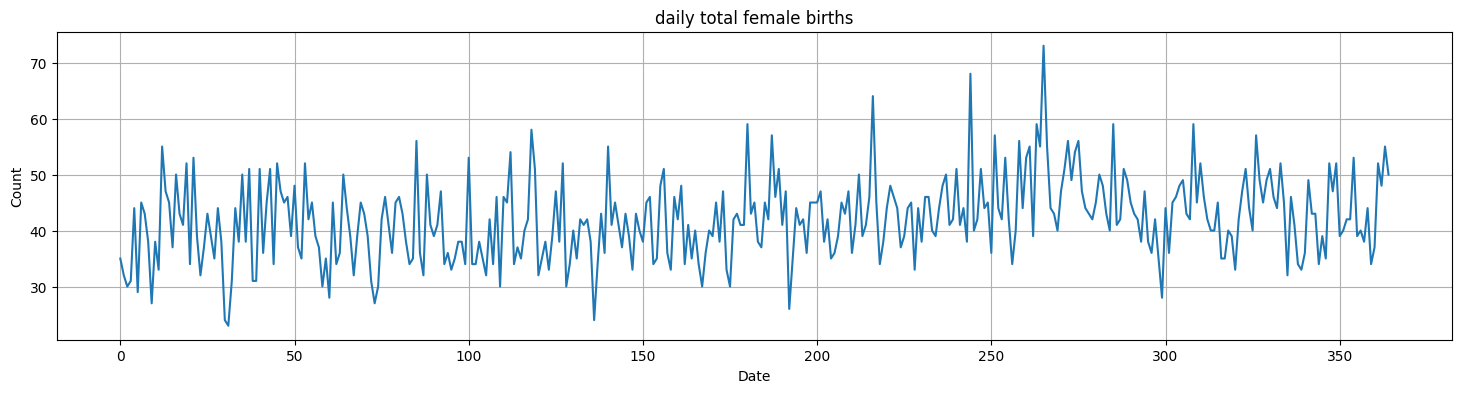

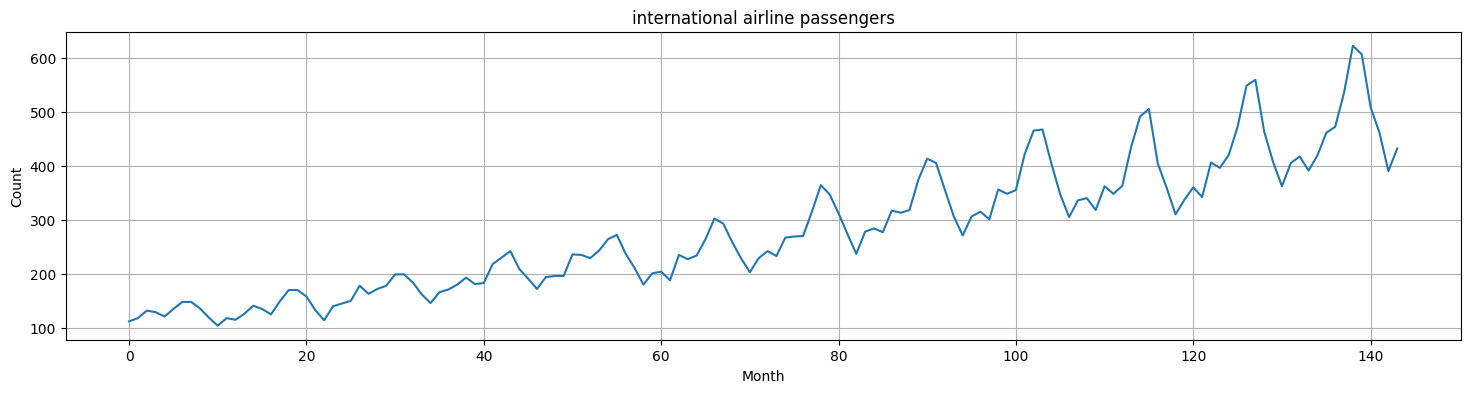

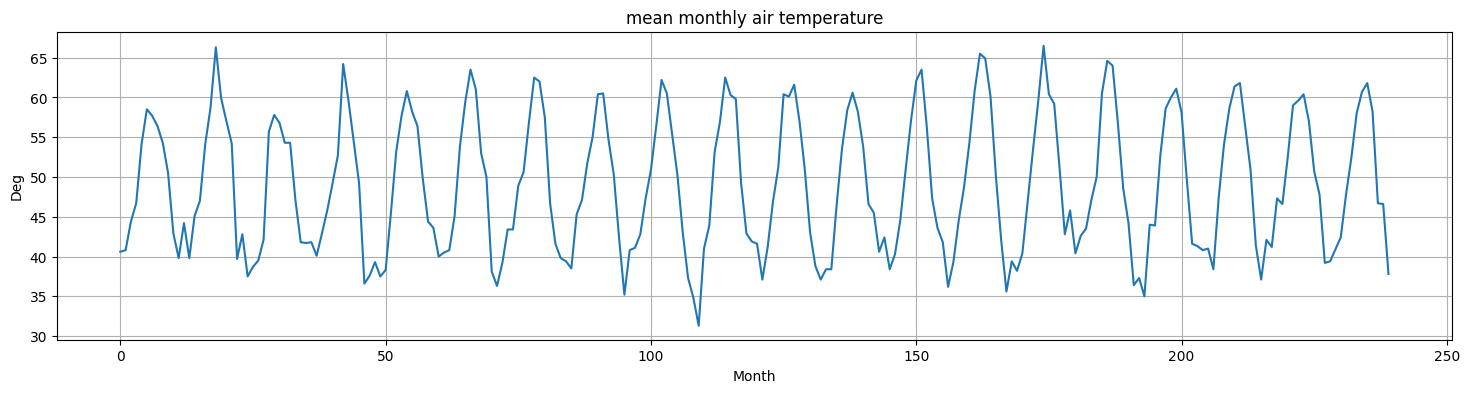

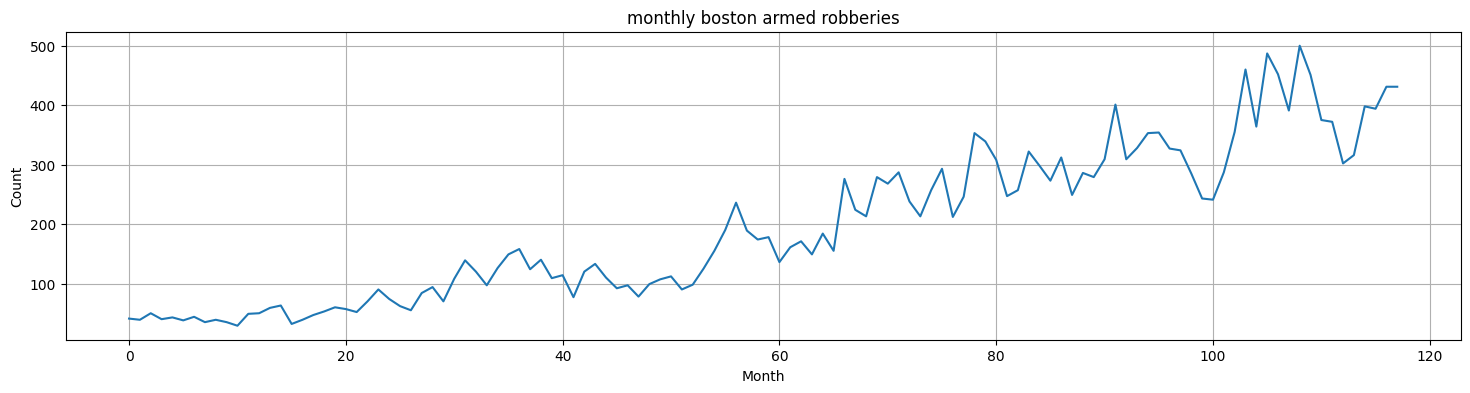

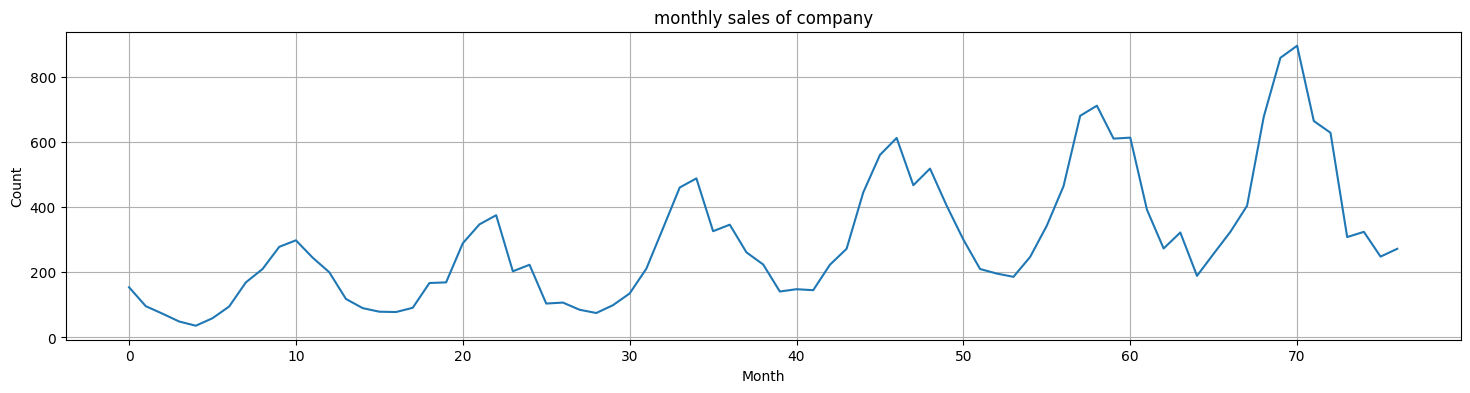

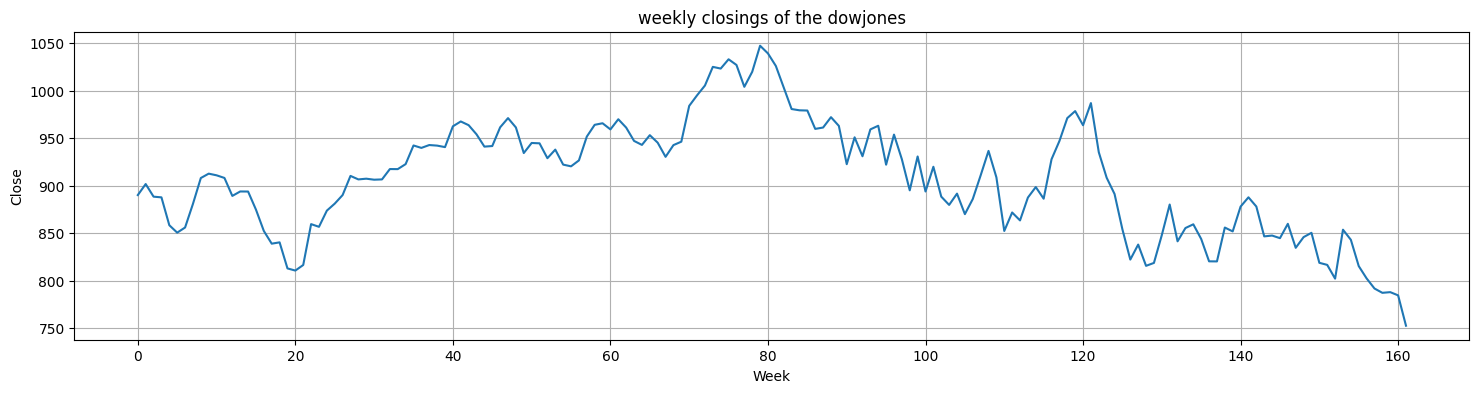

In [102]:
for name, data_frame in data.items():
    plt.figure(figsize=(18, 4))
    plt.ylabel(data_frame.columns[1])
    plt.xlabel(data_frame.columns[0])
    plt.title(name)
    plt.grid()
    plt.plot(np.array(data_frame.index), np.array(data_frame.iloc[:, 1]))
    print()

**3. Преобразование рядов в стационарные**

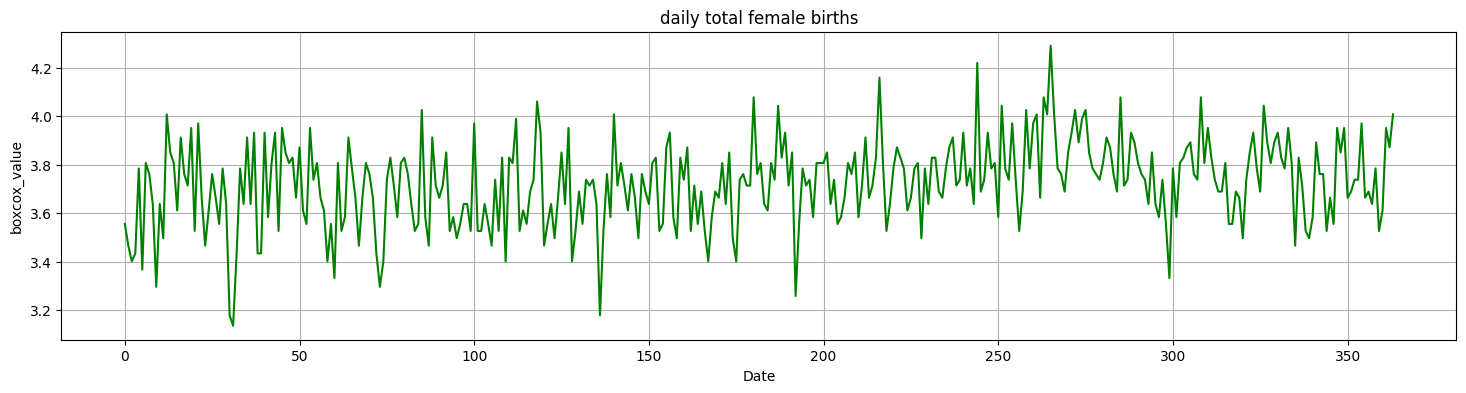

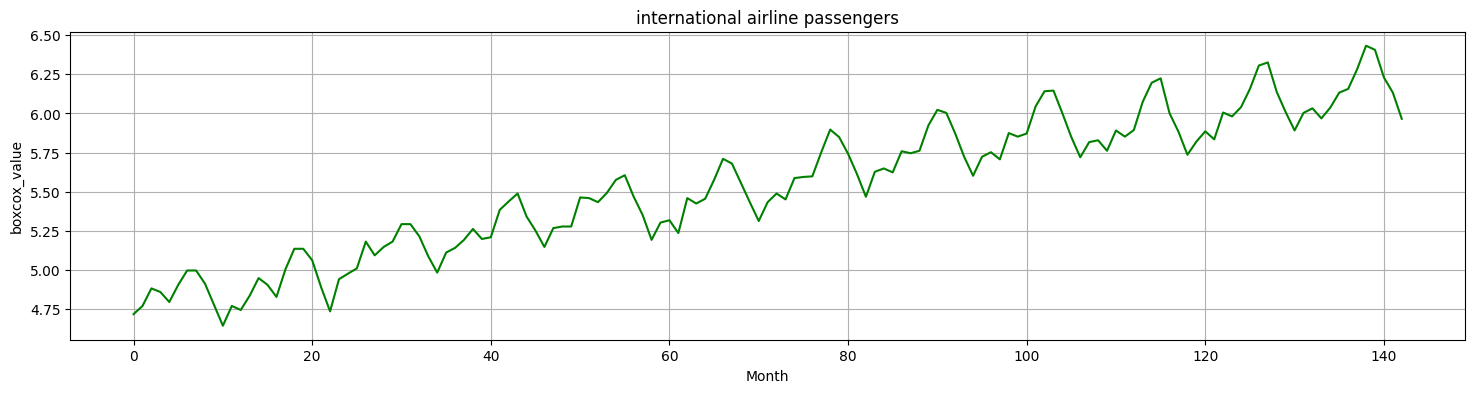

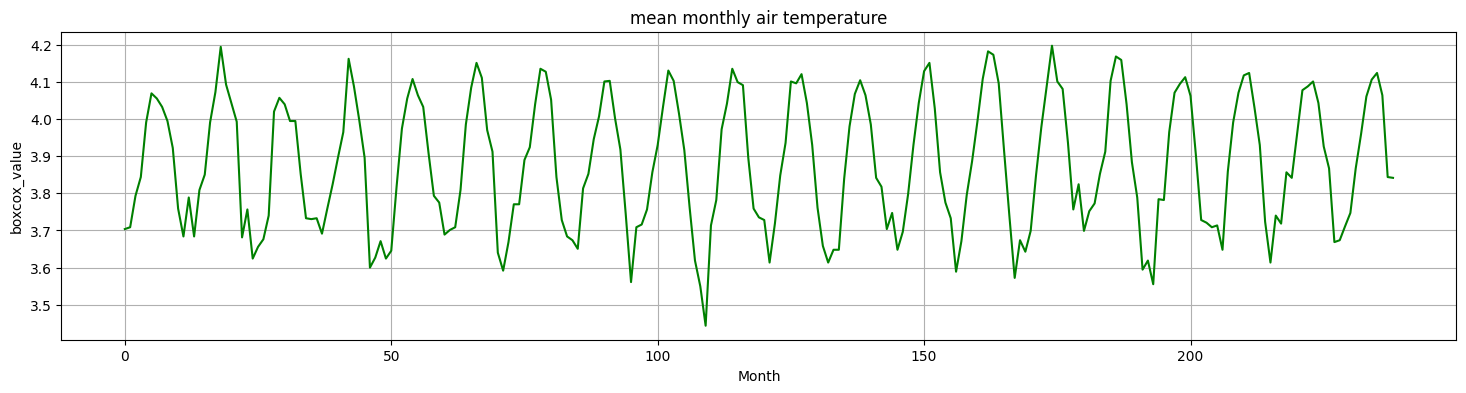

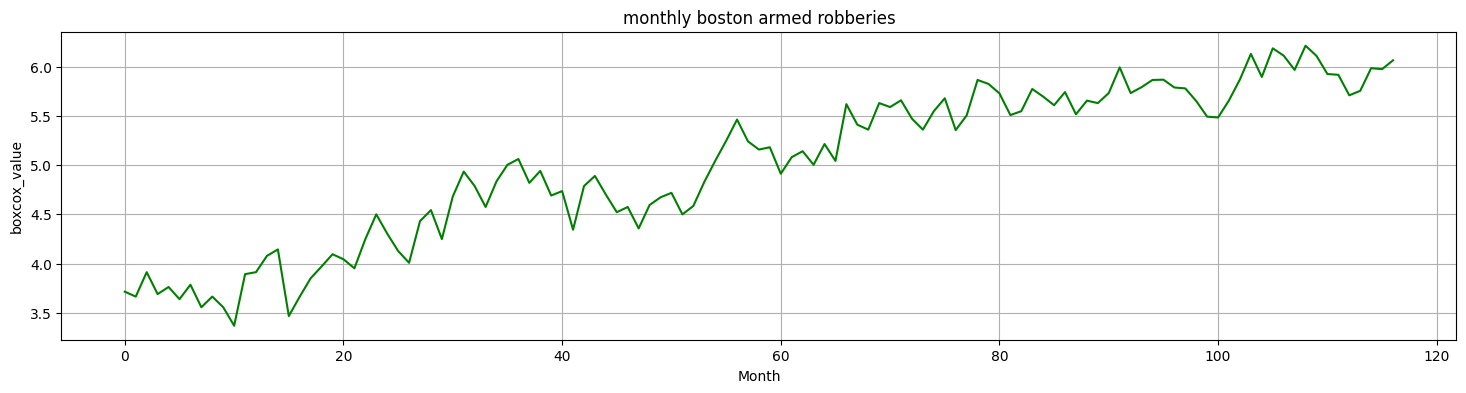

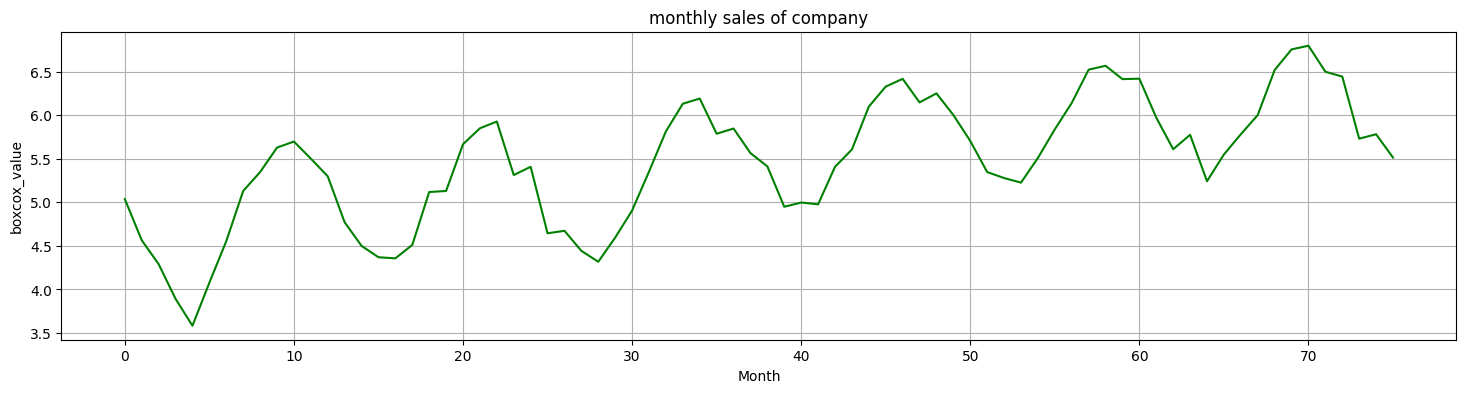

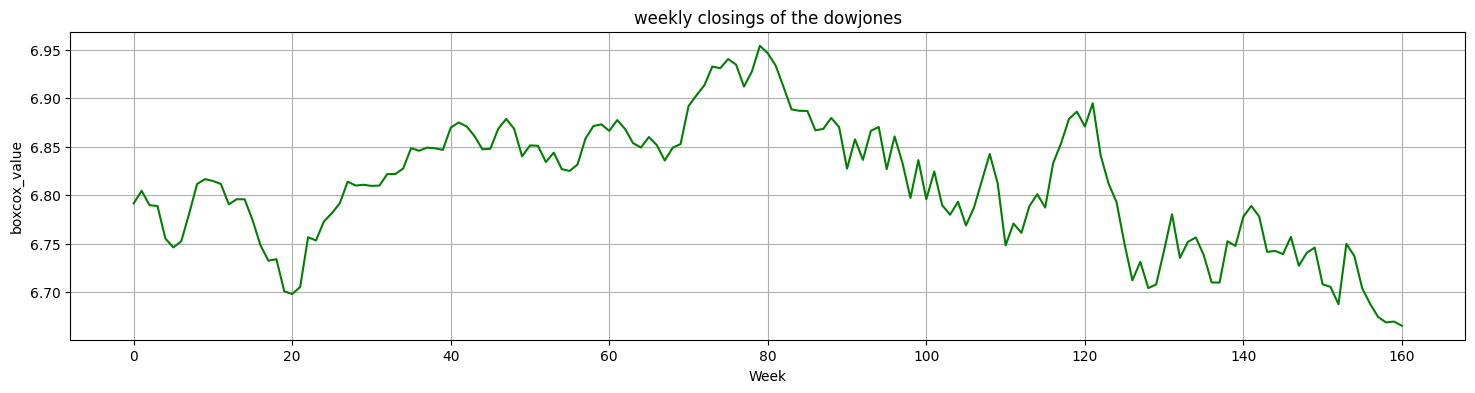

In [154]:
# Метод Бокса-Кокса
from scipy.stats import boxcox

for name, data_frame in data.items():
    boxcox_value = boxcox(np.array(data_frame.iloc[:, 1]), 0)
    data_frame['boxcox_value'] = boxcox_value

for name, data_frame in data.items():
    plt.figure(figsize=(18, 4))
    plt.ylabel('boxcox_value')
    plt.xlabel(data_frame.columns[0])
    plt.title(name)
    plt.grid()
    plt.plot(np.array(data_frame.index), data_frame['boxcox_value'], 'g')
    print()

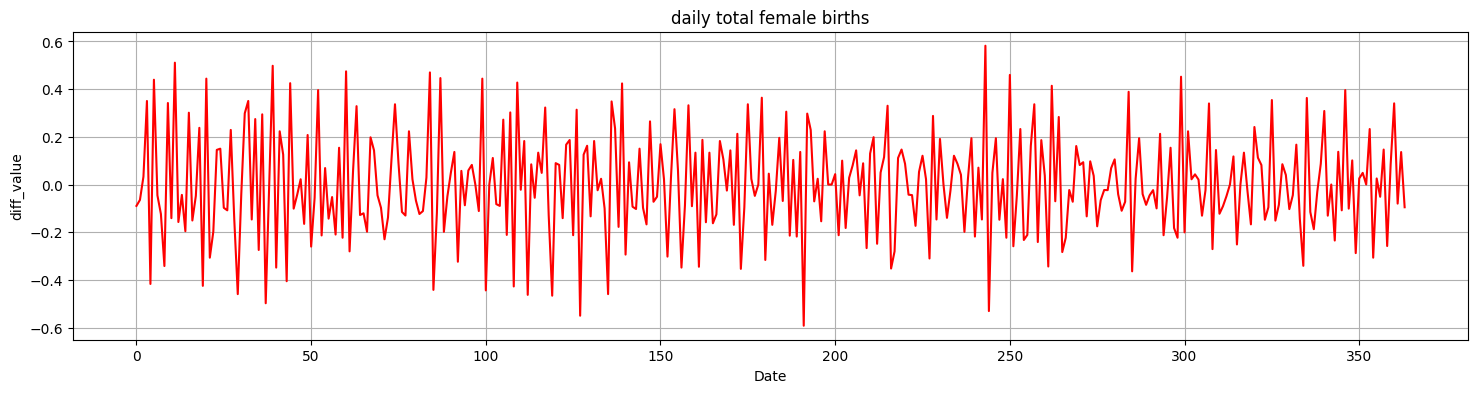

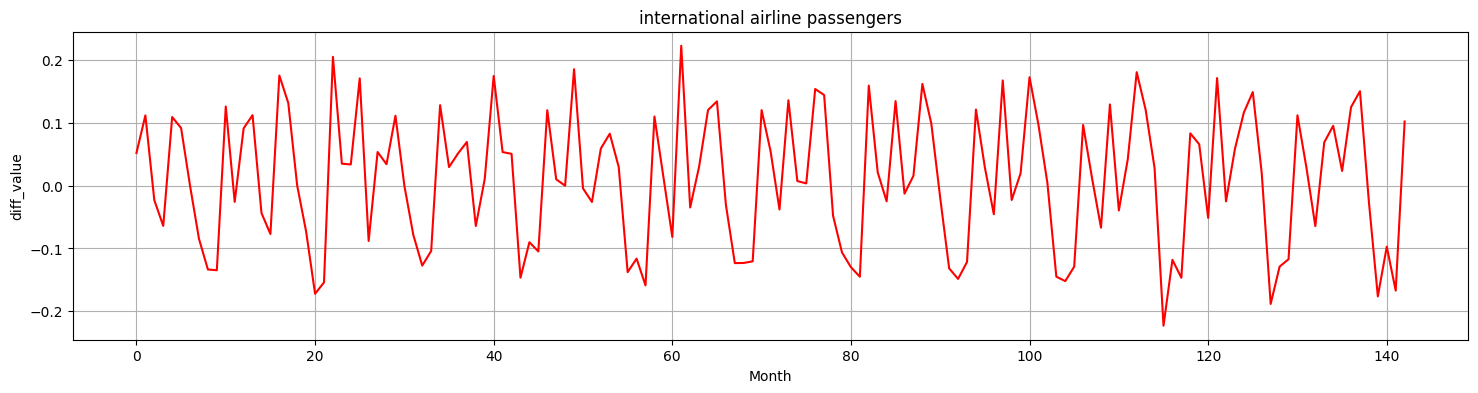

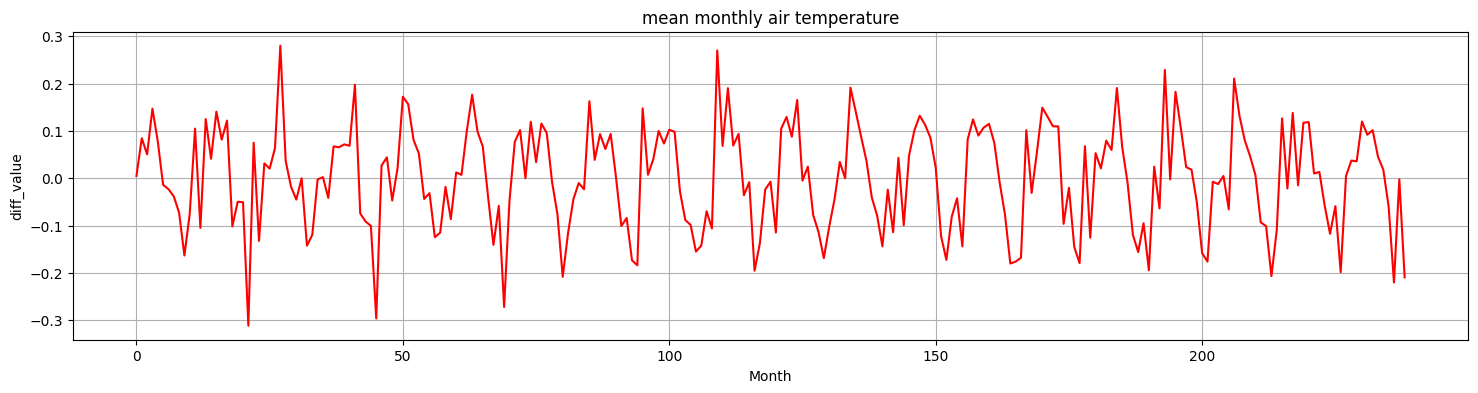

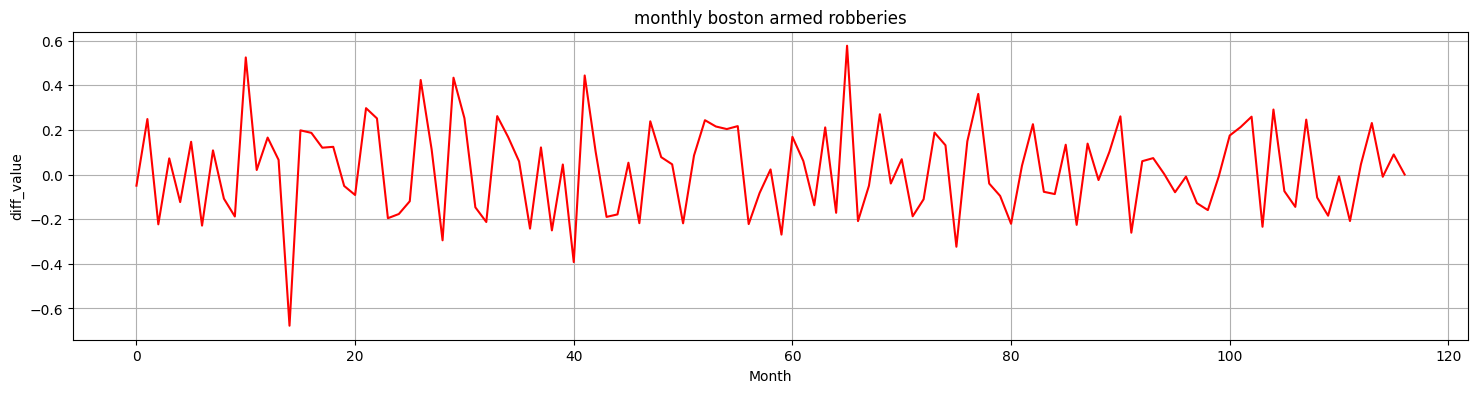

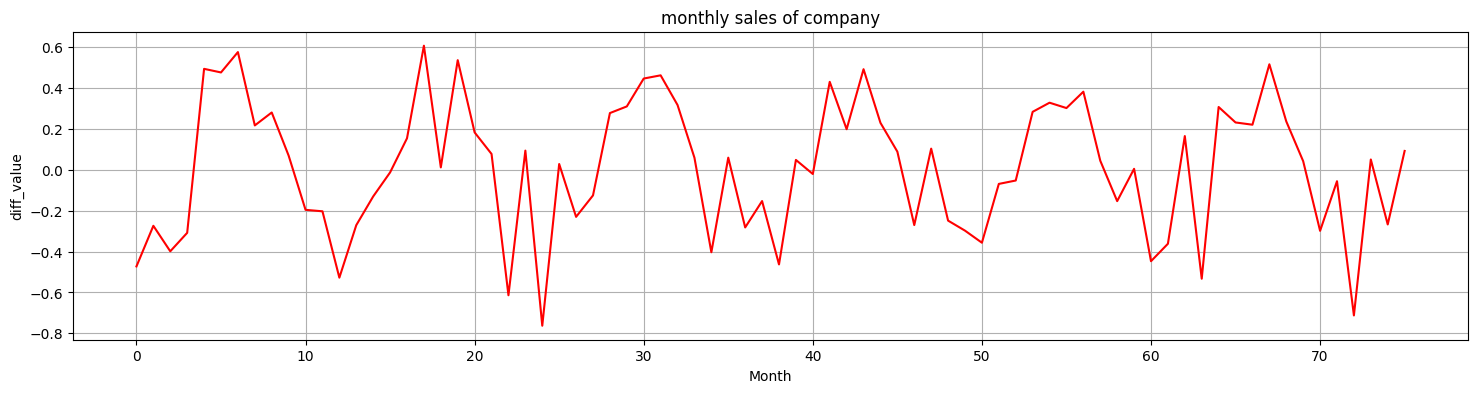

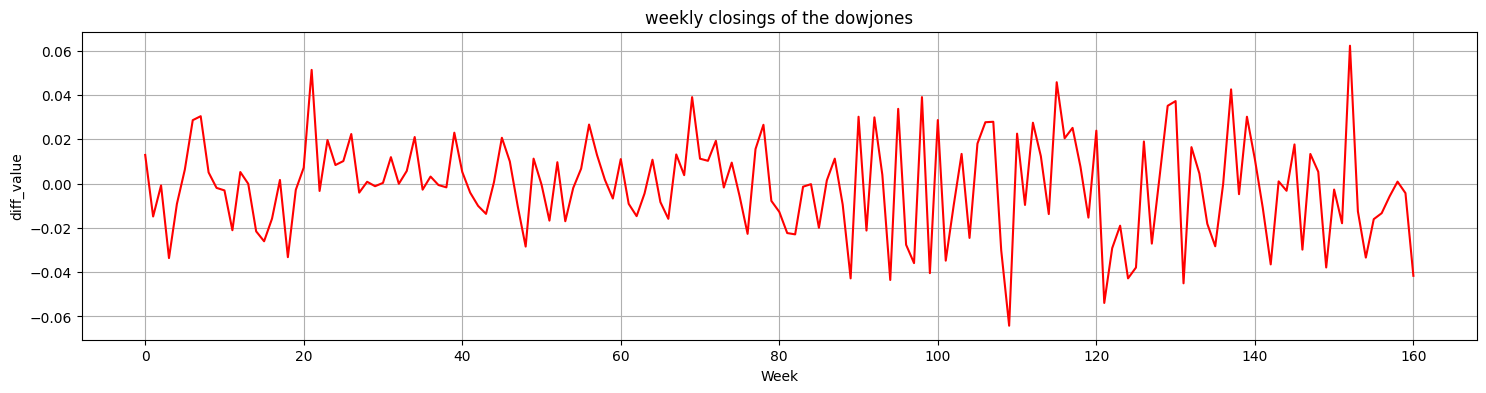

In [132]:
# Дифференцирование
for name, data_frame in data.items():
    diff_value = np.diff(data_frame['boxcox_value'], 1)
    diff_value = pd.Series(diff_value)
    data_frame['diff_value'] = diff_value
    data_frame.dropna(inplace = True)

for name, data_frame in data.items():
    plt.figure(figsize=(18, 4))
    plt.ylabel('diff_value')
    plt.xlabel(data_frame.columns[0])
    plt.title(name)
    plt.grid()
    plt.plot(np.array(data_frame.index), data_frame['diff_value'], 'r')
    print()

In [138]:
# Проверка гипотезы о стационарности методом Дики-Фуллера
from statsmodels.tsa.stattools import adfuller

adfuller_results = {}
for name, data_frame in data.items():
    adf_name = adfuller(data_frame['diff_value'])

    check = ''
    if adf_name[1] >= 0.05: check = 'ряд не стационарен'
    else: check = 'ряд стационарен'

    adfuller_results[name] = [round(adf_name[1], 2), check]

adfuller_results

{'daily total female births': [0.0, 'ряд стационарен'],
 'international airline passengers': [0.07, 'ряд не стационарен'],
 'mean monthly air temperature': [0.0, 'ряд стационарен'],
 'monthly boston armed robberies': [0.0, 'ряд стационарен'],
 'monthly sales of company': [0.02, 'ряд стационарен'],
 'weekly closings of the dowjones': [0.0, 'ряд стационарен']}

**Вывод:** Как видно из результатов теста Дики-Фуллера, после двух преобразований только один ряд остался не стационарным - international airline passengers.

In [153]:
# Повторное преобразование ряда "international airline passengers" путем дифференцирования
series = data['international airline passengers']['diff_value']
series = np.diff(series, 1)
if adfuller(series)[1] >= 0.05: print('ряд international airline passengers не стационарен')
else: print('ряд international airline passengers стационарен')

ряд international airline passengers стационарен
